## Analise exploratória dos dados


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Imporação dos dados

In [2]:
df = pd.read_csv('movies_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             494 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
Start_Tech_Oscar       506 non-null int64
dtypes: float64(12), int64(5), object(2)
memory usage: 75.2+ KB


In [12]:
# df[df['Time_taken'].isna()==False].groupby(by='Genre')['Time_taken'].mean()
df['Time_taken'] = df[['Time_taken','Genre']].groupby("Genre").transform(lambda x: x.fillna(x.mean()))

### Analise Univariada

In [16]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.392565,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,30.925080,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.690000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,159.900000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.520000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


In [158]:
np.median(df['Budget'])/(np.mean(df['Budget']))

0.9878856298299542

In [ ]:
## identificação e tratamento ds Outlier 

[array([ 290.444 ,  204.646 ,  242.162 ,  389.964 ,  412.182 ,  325.76  ,
         216.4698,  492.964 ,  377.334 , 1799.524 ,  337.488 ,  203.7404,
         421.698 ,  356.236 ,  507.876 ,  471.942 ,  306.674 ,  251.558 ,
         287.196 ,  787.036 ,  218.331 ,  520.922 ,  304.724 ,  211.9142,
         516.034 ,  850.584 , 1378.416 ,  434.324 ,  259.022 ,  308.766 ,
        1042.716 ,  301.014 ,  396.22  ,  593.116 ,  934.922 ,  381.692 ,
         236.684 ,  538.812 , 1490.682 ,  256.246 ,  241.748 ,  260.964 ,
         337.206 ,  264.944 ,  773.238 ,  206.7778,  221.246 ,  298.268 ,
         243.208 ,  308.416 ,  323.544 ,  293.562 ,  207.8126,  461.022 ,
         214.4836,  219.3308,  276.046 ,  233.436 ,  218.497 ,  206.5818,
         210.2726,  331.514 ,  281.502 ,  320.468 ,  224.66  ,  306.674 ])]

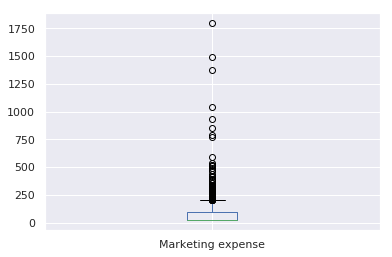

In [142]:
xx, bp = df.boxplot(column=['Marketing expense'], return_type='both')
outliers =  [flier.get_ydata() for flier in bp["fliers"]]
outliers

In [149]:
np.max(outliers)

1799.524

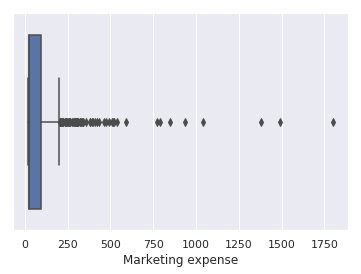

In [61]:
sb.boxplot(x=df['Marketing expense']).out

In [154]:
quantiles = df['Marketing expense'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])
quantiles

0.01     20.27221
0.25     21.64090
0.50     25.13020
0.75     93.54165
0.99    847.40660
Name: Marketing expense, dtype: float64

In [80]:
limite_superior = np.percentile(df['Marketing expense'],[99])[0]
limite_superior

847.4065999999991

In [152]:
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.600000,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.640000,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.880000,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.360000,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.480000,225.792,Drama,55,395,72400,1
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,YES,143.480000,284.592,Comedy,53,460,57400,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,YES,139.160000,243.664,Thriller,41,522,45800,0
7,22.8910,70.74,0.476,34285.460,169.6,6.980,7.075,6.875,7.170,7.96,400821,NO,116.840000,243.536,Drama,56,571,44200,0
8,24.2248,70.74,0.476,31280.205,173.5,6.910,7.075,6.850,7.000,7.96,295168,YES,118.600000,242.640,Comedy,55,564,33000,1
9,23.4008,70.74,0.476,33352.220,159.4,6.665,6.725,6.575,6.855,7.96,412012,YES,189.560000,283.024,Thriller,45,508,37800,1


In [31]:
df[df['Marketing expense']>3*limite_superior]

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
